# Steganography

Wikipedia says "Steganography is the practice of concealing a file, message, image, or video within another file, message, image, or video."

https://en.wikipedia.org/wiki/Steganography

This example cracks most of simple steganography example in png image. The exersise is held for educational and fun purpose.


Let's start with our image that might has a hidden text. We need to load the png image into np array in order to conduct the study.

In [129]:
import numpy as np
from PIL import Image

image = Image.open('png/steganography.png').convert('RGB')
array = np.array(image)

The image is a logo of one company. Let's see what is the image looks like

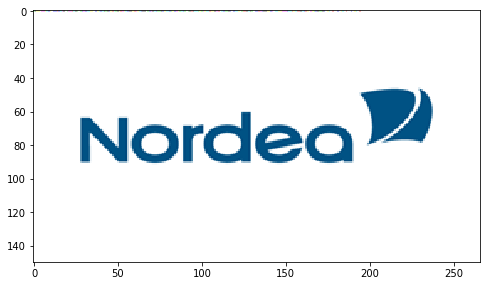

In [131]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(8, 8), dpi=72, facecolor='w', edgecolor='k')
plt.imshow(array)
plt.show()

The logo looks almost fine. The frequency analysis of colors in this image helps us to see if there are outlier pixel, noise or abnormal one. Let's use the log-scale of frequency histogram of colors.

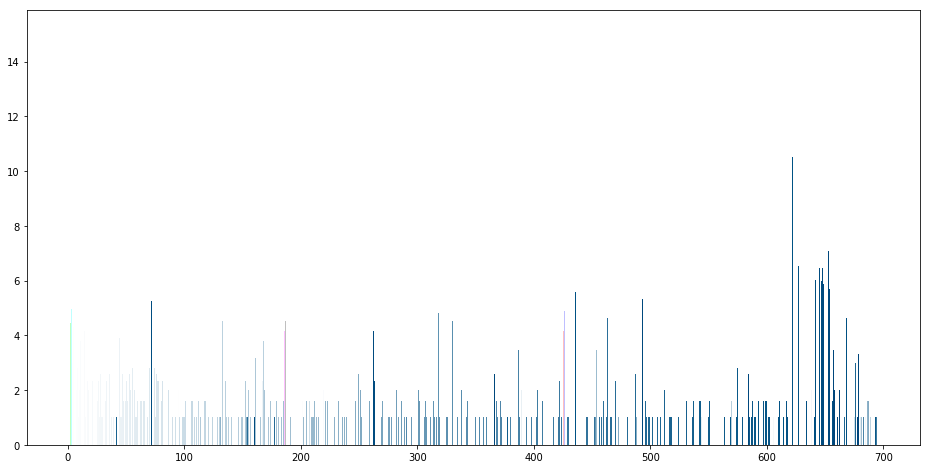

In [146]:
from math import log

def hexencode(rgb):
    return '#%02x%02x%02x' % rgb

w, h = image.size  
colors = image.getcolors(w*h)

plt.figure(num=None, figsize=(16, 8), dpi=72, facecolor='w', edgecolor='k')
for index, color in enumerate(colors):
    plt.bar(index, log(color[0], 2), color=hexencode(color[1]))

plt.show()

The histogram shows a "noise" - blue and pink colors. It's weight is significant to compare with other pixels that contributes to logo. We need to study this noise. The noise comes from the first row of the image (bearly visible with naked eye). Let's deep dive into this row

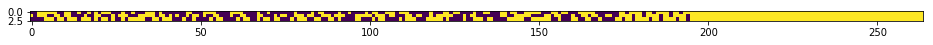

In [147]:
noise = np.array(array[0,:]).flatten()
noise = noise[0:792].reshape(264,3).transpose()

plt.figure(num=None, figsize=(16, 16), dpi=72, facecolor='w', edgecolor='k')
plt.imshow(row)
plt.show()

There is an evidence that row contains some digital message. First of all it looks like binary encoding. RGB pixel is used to encode 3 bits (Image above visualize them with yellow/black are one/zeros). We need to transform first row to martix of 8 column - one column per bit. Then transform each 8-bits row to integer and then to character.    

In [152]:
message = np.array(array[0,:]).flatten()
message = np.array([x == 255 for x in message])
message = message[0:592].reshape(74,8)
message = np.packbits(message, axis=-1).flatten()
message = ''.join([chr(x) for x in message])

print(message)


Congratulations, this is the secret message you are looking for! ~~~~~~~~
